In [1]:
#csv 불러오기
import pandas as pd
csv_te = pd.read_csv("csv_file_change.csv")
csv_te

,Unnamed: 0,id,file,label
0,0,0,1.wav,0
1,1,1,2.wav,0
2,2,2,3.wav,0
3,3,3,4.wav,0
4,4,4,5.wav,0
...,...,...,...,...
50100,50100,50100,50101.wav,1
50101,50101,50101,50102.wav,1
50102,50102,50102,50103.wav,1
50103,50103,50103,50104.wav,1


In [2]:
#필요 열만 취함
df = csv_te.drop(csv_te.columns[[0]], axis=1)
df

,id,file,label
0,0,1.wav,0
1,1,2.wav,0
2,2,3.wav,0
3,3,4.wav,0
4,4,5.wav,0
...,...,...,...
50100,50100,50101.wav,1
50101,50101,50102.wav,1
50102,50102,50103.wav,1
50103,50103,50104.wav,1


In [3]:
#섞어서 난수 생성
df_shuffled = df.sample(frac=1).reset_index(drop=True)

In [4]:
df_shuffled

,id,file,label
0,32288,32289.wav,0
1,2851,2852.wav,0
2,38327,38328.wav,0
3,25774,25775.wav,0
4,20996,20997.wav,0
...,...,...,...
50100,14726,14727.wav,0
50101,19089,19090.wav,0
50102,45947,45948.wav,0
50103,6632,6633.wav,0


In [5]:
print(df_shuffled[df_shuffled.file == '1.wav'])

       id   file  label
26495   0  1.wav      0


In [6]:
#data 들어있는 dataset 만들기, 
import librosa
from tqdm import tqdm
import os

import tensorflow as tf

#이건 gpu 실행 코드, cpu 환경은 삭제해도 좋음
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

# 이게 train dataset 작성코드
def train_dataset(x):#나눌 크기인 x초 입력
    folder = "./testwav/nomal_train/"
    dataset = []
    for file_name in tqdm(os.listdir(folder)):
        if 'wav' in file_name:
            abs_file_path = os.path.join(folder,file_name)
            data, sr = librosa.load(abs_file_path, sr = 16000)
            class_label = (df_shuffled[df_shuffled.file == file_name]['label']).values[0]
            #data를 x초로 나누어서 작성해야 함
            for i in range((len(data)//(sr*x))+1):
                dataset.append([data[int(sr*x)*i:int(sr*x)*(i+1)], class_label])
    print("Dataset 생성완료")
    return pd.DataFrame(dataset, columns=['data','label'])

def anomal_dataset(x):#나눌 크기인 x초 입력
    folder = "./testwav/abnomal_test/"
    dataset = []
    for file_name in tqdm(os.listdir(folder)):
        if 'wav' in file_name:
            abs_file_path = os.path.join(folder,file_name)
            data, sr = librosa.load(abs_file_path, sr = 16000)
            class_label = (df_shuffled[df_shuffled.file == file_name]['label']).values[0]
           #data를 x초로 나누어서 작성해야 함
            for i in range((len(data)//(sr*x))+1):
                dataset.append([data[int(sr*x)*i:int(sr*x)*(i+1)], class_label])
    print("Dataset 생성완료")
    return pd.DataFrame(dataset, columns=['data','label'])

train_wav = train_dataset(5)
abnomal_wav = anomal_dataset(5)

C:\Users\evali\anaconda3\envs\gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [03:38<00:00,  3.77s/it]


Dataset 생성완료


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:54<00:00, 10.45s/it]

Dataset 생성완료


In [7]:
#train data 확인
print(train_wav.shape)
train_wav.head()

(3143, 2)


,data,label
0,"[-0.013280152, -0.016037526, -0.013375422, -0....",0
1,"[-0.041943163, -0.040503412, -0.039855193, -0....",0
2,"[-0.0025967415, -0.0016374965, -0.0003943503, ...",0
3,"[-0.00042387503, 0.015038885, 0.0021084717, -0...",0
4,"[0.0064905523, 0.009728944, 0.007427028, 0.001...",0


In [8]:
#abnomal_wav.head()

In [9]:
#배열 확인
for i in range(len(train_wav)):
    print(len(train_wav['data'][i]))

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
67714
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
27654
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
59008
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
66370
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
74752
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
41763
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

In [10]:
#mel-spectrogram 처리
import numpy as np
mel_spec = []
for i in range(len(train_wav['data'])):
    mel_spec.append(librosa.feature.melspectrogram(y=np.array(train_wav['data'][i]), sr=16000, hop_length=160, n_mels=40))
mel_spec[0]

C:\Users\evali\anaconda3\envs\gpu\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=60
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\envs\gpu\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1394
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\envs\gpu\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=519
  return f(*args, **kwargs)


array([[1.0392726e-01, 1.1153186e-01, 9.5666170e-02, ..., 2.8151033e-02,
        3.3924963e-02, 3.4751110e-02],
       [8.0849022e-01, 1.2522532e+00, 1.6409882e+00, ..., 3.0128295e+00,
        2.4793680e+00, 1.7758167e+00],
       [9.8088108e-02, 1.3823217e-01, 1.8189251e-01, ..., 1.4204568e+00,
        1.1488639e+00, 8.3318746e-01],
       ...,
       [3.8759181e-06, 3.4277568e-06, 2.3388936e-06, ..., 3.9705639e-05,
        5.8064692e-05, 6.5531211e-05],
       [3.5975233e-06, 3.1816594e-06, 2.1710566e-06, ..., 3.7643280e-05,
        5.5048593e-05, 6.2127125e-05],
       [3.4296311e-06, 3.0332369e-06, 2.0698249e-06, ..., 3.6349920e-05,
        5.3157120e-05, 5.9992381e-05]], dtype=float32)

In [11]:
print(len(mel_spec))
print(np.array(mel_spec[0]).shape)
print(np.array(mel_spec[0][0]).shape)

3143
(40, 501)
(501,)


In [12]:
# mel-spectrogram 처리한 데이터 이후 배열 맞춤
def padding(pa):
    z = np.zeros((len(pa),len(mel_spec[0][0])-(len(pa[0]))), dtype = int)
    pa = np.append(pa, z, axis = 1)
    return pa
for i in range(len(mel_spec)):
    mel_spec[i] = padding(mel_spec[i])
print(mel_spec[-1])
print(len(mel_spec))
print(np.array(mel_spec[-1]).shape)
print(np.array(mel_spec[-1][-1]).shape)

[[1.87471677e-02 1.95831079e-02 1.66206099e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.99344915e-01 8.00023973e-01 1.11491930e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.50001031e-02 1.41831994e-01 1.84347525e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.38462349e-06 2.10974486e-06 1.44021988e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.25667964e-06 1.99655415e-06 1.36295387e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.17663796e-06 1.92574043e-06 1.31461445e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
3143
(40, 501)
(501,)


In [13]:
#Train, Validation 나눔 배열 확인
train_X, vali_X = np.split(mel_spec, [int(len(mel_spec)*0.8)])
train_y, vali_y = np.split(train_wav.label, [int(len(mel_spec)*0.8)])
print(train_X.shape)
print(vali_X.shape)

(2514, 40, 501)
(629, 40, 501)


In [14]:
# 모델 작성 가중치 추가로 올릴 때는 실행 필요 없음
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Embedding, Dense
model = Sequential()
model.add(keras.Input(shape=(len(train_X[0]),len(train_X[0][0]))))
model.add(LSTM(501, return_sequences=True))
#model.add(LSTM(200, return_sequences=True))
model.add(LSTM(200, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
#model.add(Dense(5))
#model.add(LSTM(50, return_sequences=True))
#model.add(LSTM(200, return_sequences=True))
#model.add(LSTM(200, return_sequences=True))
model.add(LSTM(1, return_sequences=False))
#model.add(TimeDistributed(Dense(1,activation='sigmoid')))
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 501)           2010012   
                                                                 
 lstm_1 (LSTM)               (None, 40, 200)           561600    
                                                                 
 lstm_2 (LSTM)               (None, 40, 50)            50200     
                                                                 
 lstm_3 (LSTM)               (None, 1)                 208       
                                                                 
Total params: 2,622,020
Trainable params: 2,622,020
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 모델 불러오기, 가중치 추가로 올릴 때 반드시 필요
model = tf.keras.models.load_model('model23.h5')

In [15]:
# 모델 학습
import tensorflow as tf
from keras.callbacks import EarlyStopping

os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)
        
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
#early_stopping = EarlyStopping()
history = model.fit(train_X, train_y, epochs=500, batch_size = 40, validation_data=(vali_X, vali_y)
                    #,callbacks = [early_stopping]
                   )

Epoch 1/500
63/63 [==============================] - 12s 58ms/step - loss: 0.2257 - accuracy: 0.7951 - val_loss: 0.2547 - val_accuracy: 0.7568
Epoch 2/500
63/63 [==============================] - 2s 24ms/step - loss: 0.1659 - accuracy: 0.8389 - val_loss: 0.1623 - val_accuracy: 0.8410
Epoch 3/500
63/63 [==============================] - 2s 24ms/step - loss: 0.1197 - accuracy: 0.8819 - val_loss: 0.2333 - val_accuracy: 0.7663
Epoch 4/500
63/63 [==============================] - 2s 24ms/step - loss: 0.1024 - accuracy: 0.8986 - val_loss: 0.1458 - val_accuracy: 0.8553
Epoch 5/500
63/63 [==============================] - 2s 24ms/step - loss: 0.0885 - accuracy: 0.9133 - val_loss: 0.1542 - val_accuracy: 0.8474
Epoch 6/500
63/63 [==============================] - 2s 24ms/step - loss: 0.0990 - accuracy: 0.9033 - val_loss: 0.2131 - val_accuracy: 0.7854
Epoch 7/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1321 - accuracy: 0.8675 - val_loss: 0.1326 - val_accuracy: 0.8728
Epoch

63/63 [==============================] - 2s 24ms/step - loss: 0.0603 - accuracy: 0.9399 - val_loss: 0.1603 - val_accuracy: 0.8410
Epoch 59/500
63/63 [==============================] - 2s 24ms/step - loss: 0.0603 - accuracy: 0.9395 - val_loss: 0.2431 - val_accuracy: 0.7552
Epoch 60/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0520 - accuracy: 0.9479 - val_loss: 0.1544 - val_accuracy: 0.8458
Epoch 61/500
63/63 [==============================] - 2s 24ms/step - loss: 0.0530 - accuracy: 0.9471 - val_loss: 0.1398 - val_accuracy: 0.8601
Epoch 62/500
63/63 [==============================] - 2s 24ms/step - loss: 0.0620 - accuracy: 0.9379 - val_loss: 0.1587 - val_accuracy: 0.8410
Epoch 63/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0674 - accuracy: 0.9328 - val_loss: 0.2086 - val_accuracy: 0.7917
Epoch 64/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0572 - accuracy: 0.9431 - val_loss: 0.1578 - val_accuracy: 0.8442
Epoch 65/500

63/63 [==============================] - 2s 24ms/step - loss: 0.0729 - accuracy: 0.9268 - val_loss: 0.1945 - val_accuracy: 0.8060
Epoch 116/500
63/63 [==============================] - 2s 24ms/step - loss: 0.0707 - accuracy: 0.9292 - val_loss: 0.1399 - val_accuracy: 0.8601
Epoch 117/500
63/63 [==============================] - 2s 24ms/step - loss: 0.0936 - accuracy: 0.9061 - val_loss: 0.1833 - val_accuracy: 0.8172
Epoch 118/500
63/63 [==============================] - 2s 24ms/step - loss: 0.0789 - accuracy: 0.9212 - val_loss: 0.1623 - val_accuracy: 0.8378
Epoch 119/500
63/63 [==============================] - 2s 24ms/step - loss: 0.0695 - accuracy: 0.9304 - val_loss: 0.1774 - val_accuracy: 0.8219
Epoch 120/500
63/63 [==============================] - 2s 24ms/step - loss: 0.0648 - accuracy: 0.9352 - val_loss: 0.1322 - val_accuracy: 0.8680
Epoch 121/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0587 - accuracy: 0.9411 - val_loss: 0.1535 - val_accuracy: 0.8458
Epoch 

Epoch 172/500
63/63 [==============================] - 2s 24ms/step - loss: 0.0553 - accuracy: 0.9447 - val_loss: 0.1538 - val_accuracy: 0.8458
Epoch 173/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0549 - accuracy: 0.9451 - val_loss: 0.1539 - val_accuracy: 0.8458
Epoch 174/500
63/63 [==============================] - 2s 24ms/step - loss: 0.0549 - accuracy: 0.9451 - val_loss: 0.1539 - val_accuracy: 0.8458
Epoch 175/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0549 - accuracy: 0.9451 - val_loss: 0.1539 - val_accuracy: 0.8458
Epoch 176/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0549 - accuracy: 0.9451 - val_loss: 0.1539 - val_accuracy: 0.8458
Epoch 177/500
63/63 [==============================] - 2s 24ms/step - loss: 0.0549 - accuracy: 0.9451 - val_loss: 0.1539 - val_accuracy: 0.8458
Epoch 178/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0549 - accuracy: 0.9451 - val_loss: 0.1540 - val_accuracy:

Epoch 229/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1380 - accuracy: 0.8616 - val_loss: 0.2226 - val_accuracy: 0.7774
Epoch 230/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1333 - accuracy: 0.8667 - val_loss: 0.2177 - val_accuracy: 0.7822
Epoch 231/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1201 - accuracy: 0.8799 - val_loss: 0.1860 - val_accuracy: 0.8140
Epoch 232/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1353 - accuracy: 0.8648 - val_loss: 0.1638 - val_accuracy: 0.8362
Epoch 233/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1404 - accuracy: 0.8596 - val_loss: 0.1956 - val_accuracy: 0.8045
Epoch 234/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1193 - accuracy: 0.8807 - val_loss: 0.1573 - val_accuracy: 0.8426
Epoch 235/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1908 - accuracy: 0.8091 - val_loss: 0.3609 - val_accuracy:

Epoch 286/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0986 - accuracy: 0.9014 - val_loss: 0.1876 - val_accuracy: 0.8124
Epoch 287/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0986 - accuracy: 0.9014 - val_loss: 0.1876 - val_accuracy: 0.8124
Epoch 288/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1092 - accuracy: 0.8910 - val_loss: 0.1510 - val_accuracy: 0.8490
Epoch 289/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1687 - accuracy: 0.8313 - val_loss: 0.2512 - val_accuracy: 0.7488
Epoch 290/500
63/63 [==============================] - 2s 24ms/step - loss: 0.1742 - accuracy: 0.8258 - val_loss: 0.2544 - val_accuracy: 0.7456
Epoch 291/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1471 - accuracy: 0.8528 - val_loss: 0.1701 - val_accuracy: 0.8299
Epoch 292/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1356 - accuracy: 0.8644 - val_loss: 0.1701 - val_accuracy:

Epoch 343/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1340 - accuracy: 0.8660 - val_loss: 0.1701 - val_accuracy: 0.8299
Epoch 344/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1340 - accuracy: 0.8660 - val_loss: 0.1701 - val_accuracy: 0.8299
Epoch 345/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1340 - accuracy: 0.8660 - val_loss: 0.1701 - val_accuracy: 0.8299
Epoch 346/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1340 - accuracy: 0.8660 - val_loss: 0.1701 - val_accuracy: 0.8299
Epoch 347/500
63/63 [==============================] - 2s 24ms/step - loss: 0.1340 - accuracy: 0.8660 - val_loss: 0.1701 - val_accuracy: 0.8299
Epoch 348/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1340 - accuracy: 0.8660 - val_loss: 0.1701 - val_accuracy: 0.8299
Epoch 349/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1340 - accuracy: 0.8660 - val_loss: 0.1701 - val_accuracy:

Epoch 400/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1380 - accuracy: 0.8620 - val_loss: 0.2019 - val_accuracy: 0.7981
Epoch 401/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1380 - accuracy: 0.8620 - val_loss: 0.2019 - val_accuracy: 0.7981
Epoch 402/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1380 - accuracy: 0.8620 - val_loss: 0.2019 - val_accuracy: 0.7981
Epoch 403/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1380 - accuracy: 0.8620 - val_loss: 0.2019 - val_accuracy: 0.7981
Epoch 404/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1380 - accuracy: 0.8620 - val_loss: 0.2019 - val_accuracy: 0.7981
Epoch 405/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1380 - accuracy: 0.8620 - val_loss: 0.2019 - val_accuracy: 0.7981
Epoch 406/500
63/63 [==============================] - 2s 25ms/step - loss: 0.1380 - accuracy: 0.8620 - val_loss: 0.2019 - val_accuracy:

Epoch 457/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0384 - accuracy: 0.9614 - val_loss: 0.1533 - val_accuracy: 0.8458
Epoch 458/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0375 - accuracy: 0.9626 - val_loss: 0.1564 - val_accuracy: 0.8410
Epoch 459/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0408 - accuracy: 0.9594 - val_loss: 0.1496 - val_accuracy: 0.8506
Epoch 460/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0382 - accuracy: 0.9618 - val_loss: 0.1594 - val_accuracy: 0.8410
Epoch 461/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0375 - accuracy: 0.9634 - val_loss: 0.1543 - val_accuracy: 0.8458
Epoch 462/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0374 - accuracy: 0.9626 - val_loss: 0.1551 - val_accuracy: 0.8442
Epoch 463/500
63/63 [==============================] - 2s 25ms/step - loss: 0.0367 - accuracy: 0.9634 - val_loss: 0.1648 - val_accuracy:

In [17]:
#모델 저장하기
model.save('model21.h5')

In [16]:
#Test data mel-spectrogram 처리
import numpy as np
ab_mel_spec = []
for i in range(len(abnomal_wav['data'])):
    ab_mel_spec.append(librosa.feature.melspectrogram(y=np.array(abnomal_wav['data'][i]), sr=16000, hop_length=160, n_mels=40))
ab_mel_spec[0]

array([[1.5880130e-04, 2.2788357e-04, 2.7796414e-04, ..., 1.2422971e-02,
        1.7363025e-02, 1.9252947e-02],
       [4.4280893e-04, 5.2444340e-04, 5.3894322e-04, ..., 2.5061586e+00,
        1.7762721e+00, 1.0853226e+00],
       [3.8662105e-04, 4.2878473e-04, 3.9724025e-04, ..., 1.8334988e+00,
        1.2167000e+00, 6.8570912e-01],
       ...,
       [3.1289266e-11, 2.7662062e-11, 1.8867713e-11, ..., 2.8283503e-06,
        4.1358621e-06, 4.6674377e-06],
       [2.6578654e-11, 2.3499378e-11, 1.6029863e-11, ..., 2.6800092e-06,
        3.9189467e-06, 4.4226445e-06],
       [2.3989286e-11, 2.1210972e-11, 1.4469598e-11, ..., 2.5870866e-06,
        3.7830694e-06, 4.2693027e-06]], dtype=float32)

In [17]:
# test data 배열 맞추기
for i in range(len(ab_mel_spec)):
    ab_mel_spec[i] = padding(ab_mel_spec[i])

In [18]:
# 배열 test X, test y
ab_X = np.array(ab_mel_spec)
ab_y = np.array(abnomal_wav.label)
print(ab_X.shape)
print(ab_y.shape)

(1178, 40, 501)
(1178,)


In [19]:
# test data evaluate
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)
model.evaluate(ab_X, ab_y)

37/37 [==============================] - 3s 15ms/step - loss: 0.0538 - accuracy: 0.9476


[0.053793732076883316, 0.9476351141929626]

In [20]:
# predict
ab_y_pred = model.predict(ab_X)

37/37 [==============================] - 2s 11ms/step


In [22]:
# predict 확인
ab_y_pred
#= ab_y_pred.reshape((len(ab_X),))

array([[2.4283264e-10],
       [2.2543079e-10],
       [2.4369046e-10],
       ...,
       [2.4036736e-10],
       [2.4366154e-10],
       [2.3673677e-10]], dtype=float32)

In [23]:
# 복원한 값 시각화
import librosa.display
import matplotlib.pyplot as plt

librosa.display.specshow(ab_y_pred[27], y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel_Spectrogram_pred.png')
plt.show()

IndexError: tuple index out of range

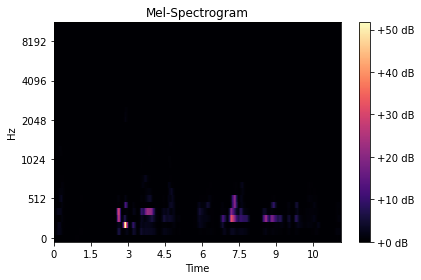

In [24]:
# 원본 값 시각화
librosa.display.specshow(ab_X[27], y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel_Spectrogram_origin.png')
plt.show()

In [22]:
# test 원본 확인
ab_X

array([[[1.58801296e-04, 2.27883575e-04, 2.77964136e-04, ...,
         1.24229714e-02, 1.73630249e-02, 1.92529466e-02],
        [4.42808931e-04, 5.24443400e-04, 5.38943219e-04, ...,
         2.50615859e+00, 1.77627206e+00, 1.08532262e+00],
        [3.86621046e-04, 4.28784726e-04, 3.97240248e-04, ...,
         1.83349884e+00, 1.21669996e+00, 6.85709119e-01],
        ...,
        [3.12892663e-11, 2.76620619e-11, 1.88677129e-11, ...,
         2.82835026e-06, 4.13586213e-06, 4.66743768e-06],
        [2.65786542e-11, 2.34993778e-11, 1.60298632e-11, ...,
         2.68000917e-06, 3.91894673e-06, 4.42264445e-06],
        [2.39892863e-11, 2.12109722e-11, 1.44695983e-11, ...,
         2.58708656e-06, 3.78306936e-06, 4.26930274e-06]],

       [[2.16083471e-02, 1.93145853e-02, 1.36588141e-02, ...,
         9.95389223e-02, 1.43803075e-01, 1.61424845e-01],
        [9.54433739e-01, 1.42886281e+00, 1.82805741e+00, ...,
         1.63534057e+00, 1.34971440e+00, 9.88414049e-01],
        [4.88172084e-01, 

In [22]:
#test X, y_pted 배열 확인
print(ab_X.shape)
print(ab_y_pred.shape)

(298, 40, 501)
(298, 40, 501)


In [81]:
#mse 하기 위해 배열 2차원으로 변환
ab_X1 = ab_X.reshape(6293, 20040)
ab_y_pred1 = ab_y_pred.reshape(6293, 20040)

In [88]:
#mean squared error
mse = np.mean(np.power(ab_X1 - ab_y_pred1, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': ab_y})

In [89]:
mse.shape

(6293,)

In [90]:
error_df

,Reconstruction_error,True_class
0,0.391386,0
1,0.221874,0
2,0.403491,0
3,0.360533,0
4,0.126547,0
...,...,...
6288,0.203697,0
6289,0.573454,0
6290,0.227688,0
6291,0.425460,0


In [91]:
# metrics 에서 막힘
from sklearn import metrics
precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error'])
#index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
#threshold_fixed = threshold_rt[index_cnt]
print(precision_rt)
print(recall_rt)
print(threshold_rt)
#print(index_cnt)

[0. 1.]
[nan  0.]
[527.17694923]


C:\Users\evali\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


NameError: name 'threshold_fixed' is not defined

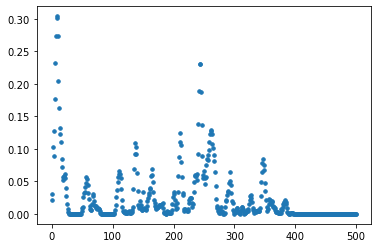

In [53]:
#그래프 그리기
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "phishing" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
print("anomaly detection predicted plot :")
plt.show()

In [70]:
# ???? 이건 뭐죠?
y_pred = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

cf_matrix = metrics.confusion_matrix(error_df['True_class'], y_pred)

NameError: name 'threshold_fixed' is not defined

In [ ]:
# 그래프 그리기
plt.figure(figsize=(7, 7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

In [ ]:
# reshape 실험용 안 쓰일 수 있음
#ab_X = ab_X.reshape(ab_X.shape[0]*ab_X.shape[1],ab_X.shape[2])
#ab_y_pred = ab_y_pred.reshape(ab_y_pred.shape[0]*ab_y_pred.shape[1],ab_y_pred.shape[2])

In [ ]:
#print(ab_X.shape)
#print(ab_y_pred.shape)

In [21]:
# flatten 및 0,1 바이너리로 나누기 이게 맞나 확인용
#ab_X = np.array(ab_X).flatten()
ab_X = np.where(ab_X > 0.5, 1,0)
#ab_y_pred = np.array(ab_y_pred).flatten()
ab_y_pred = np.where(ab_y_pred > 0.5, 1,0)

In [31]:
# 0,1 바이너리 나눈 것 확인 원본
ab_X.shape

(23607120,)

In [96]:
np.unique(ab_X)

array([0, 1])

In [97]:
# 0,1 바이너리 나눈 것 확인 pred
ab_y_pred

array([0, 0, 0, ..., 0, 0, 0])

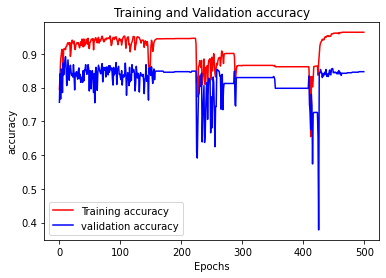

In [22]:
#train & validation accuracy 확인
import matplotlib.pyplot as plt

n_epochs = len(history.history['loss'])
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,n_epochs)
plt.plot(epochs, loss_train, 'r', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy') ## <=loss아니고, accuracy임^^
plt.legend()
plt.show()

In [38]:
#배열 확인
for i in range(len(train_wav)):
    print(len(train_wav['data'][i]))

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
67714
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
27654
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
59008
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
66370
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

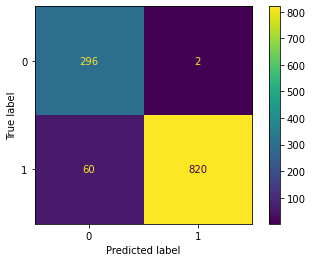

In [24]:
# confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ab_y, ab_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1'])
cm_display.plot()
plt.savefig('confusion_lstm1.png')
plt.show()

In [101]:
#각 스코어 확인
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
print('Acc Score: ',accuracy_score(ab_X,ab_y_pred))
print('Recall Score: ',recall_score(ab_X,ab_y_pred))
print('Pre Score: ',precision_score(ab_X,ab_y_pred))
print('F1 Score: ',f1_score(ab_X,ab_y_pred))

Acc Score:  0.9602587689708776
Recall Score:  0.57100817113834
Pre Score:  0.726564358217651
F1 Score:  0.6394620354764635


In [102]:
# ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ab_X, ab_y_pred)
roc = pd.DataFrame({
    'FPR(Fall-out)': fpr,
    'TPRate(Recall)': tpr,
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,2
1,0.014136,0.571008,1
2,1.000000,1.000000,0


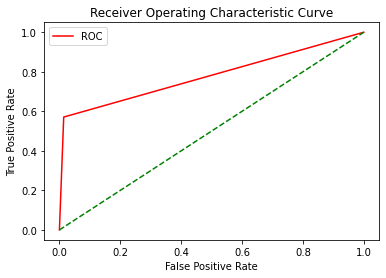

In [103]:
# ROC 커브 확인 커브 된 것 맞음
import matplotlib.pyplot as plt
import seaborn as sns
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [106]:
# flatten 된 배열 다시 -1,1로 바꾸기
ab_X = ab_X.reshape(-1,1)
ab_y_pred = ab_y_pred.reshape(-1,1)

In [ ]:
#아 randomforest 해야했나
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(ab_X, ab_y_pred)
rf.score(ab_X,ab_y_pred)

C:\Users\evali\AppData\Local\Temp\ipykernel_16984\817173717.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(ab_X, ab_y_pred)


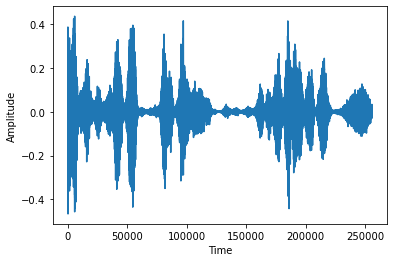

In [123]:
import matplotlib.pyplot as plt
C = librosa.feature.inverse.mel_to_audio(ab_X[27])
plt.plot(C)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.savefig('wav_origin4.png')
plt.show()

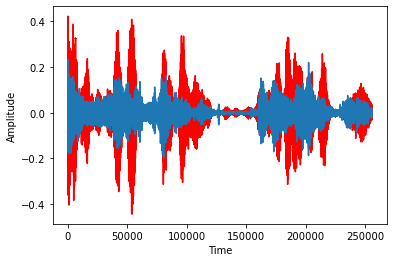

In [124]:
import matplotlib.pyplot as plt
C = librosa.feature.inverse.mel_to_audio(ab_X[27])
plt.plot(C, color='red')
D = librosa.feature.inverse.mel_to_audio(ab_y_pred[27])
plt.plot(D)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.savefig('wav_mix.png')
plt.show()

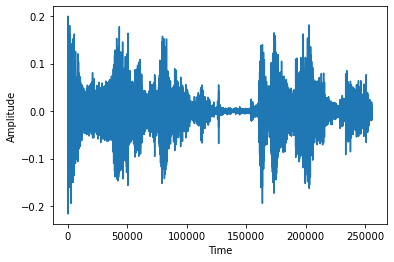

In [125]:
D = librosa.feature.inverse.mel_to_audio(ab_y_pred[27])
plt.plot(D)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.savefig('wav_pred4.png')
plt.show()

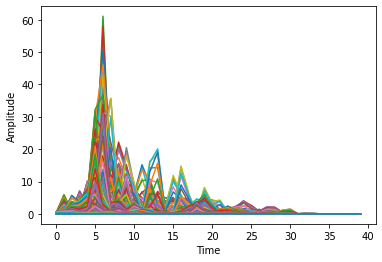

In [126]:
audioa = ab_X[27]
plt.plot(audioa)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.savefig('mel_origin4.png')
plt.show()

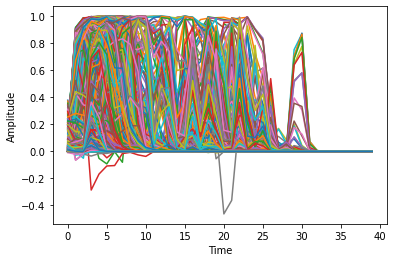

In [127]:
audiob = ab_y_pred[27]
plt.plot(audiob)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.savefig('mel_pred4.png')
plt.show()